In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

In [2]:
import os
os.getcwd()

'C:\\Users\\kdubelite\\Desktop\\College\\Semester 6\\Data Science\\DS Project'

In [3]:
path = 'C:\\Users\\kdubelite\\Desktop\\College\\Semester 6\\Data Science\\DS Project\\Data\\train\\Images\\img_3563.jpg'

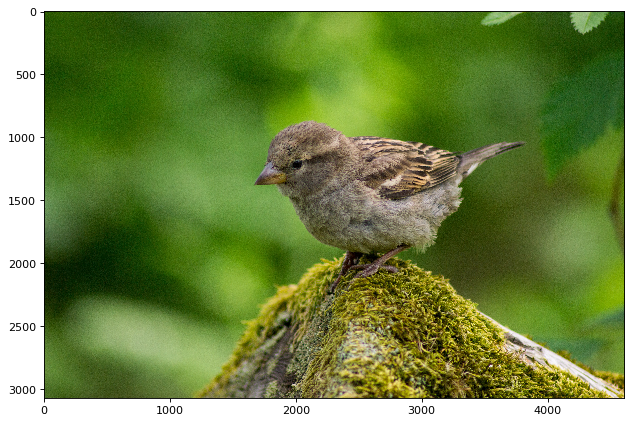

In [4]:
image = imread(path)
plt.figure(num = None, figsize = (8, 6), dpi = 80)
imshow(image)

In [11]:
from keras.preprocessing.image import  img_to_array, load_img

target_size = (256,256)
# Get images
Ximg = []
Ximg.append(load_img(path,target_size=target_size))

In [13]:
Xsub_rgb = []
for img in Ximg:    
    Xsub_rgb.append(img_to_array(img))   
    
print(Xsub_rgb[0].shape)
print(Xsub_rgb[0])

## convert the entire list to numpy array
Xsub_rgb = np.array(Xsub_rgb)

(256, 256, 3)
[[[ 52. 102.  13.]
  [ 48.  94.   6.]
  [ 47.  96.   5.]
  ...
  [ 32.  81.  16.]
  [ 18.  66.   6.]
  [ 19.  79.  19.]]

 [[ 40.  85.   0.]
  [ 45.  89.   2.]
  [ 42.  84.   0.]
  ...
  [ 41.  83.  19.]
  [ 24.  73.   7.]
  [ 31.  87.  22.]]

 [[ 42.  90.   6.]
  [ 45.  88.   0.]
  [ 47.  91.   4.]
  ...
  [ 51.  91.  28.]
  [ 32.  78.  13.]
  [ 19.  82.  12.]]

 ...

 [[ 84. 120.  46.]
  [ 76. 110.  34.]
  [ 74. 104.  32.]
  ...
  [200. 186. 121.]
  [190. 183.  30.]
  [246. 213. 136.]]

 [[ 77. 113.  41.]
  [ 71. 107.  33.]
  [ 80. 110.  38.]
  ...
  [165. 144.   1.]
  [170. 155.   0.]
  [205. 188.  56.]]

 [[ 61.  96.  28.]
  [ 73. 109.  37.]
  [ 77. 108.  38.]
  ...
  [155. 161.  13.]
  [187. 162.  10.]
  [234. 207. 128.]]]


In [14]:
## Extrat the first few example images
Nsample = Xsub_rgb.shape[0]

def plotMinMax(Xsub_rgb,labels=["R","G","B"]):
    print("______________________________")
    for i, lab in enumerate(labels):
        mi = np.min(Xsub_rgb[:,:,:,i])
        ma = np.max(Xsub_rgb[:,:,:,i])
        print("{} : MIN={:8.4f}, MAX={:8.4f}".format(lab,mi,ma))
        
plotMinMax(Xsub_rgb,labels=["R","G","B"])    

______________________________
R : MIN=  0.0000, MAX=255.0000
G : MIN=  0.0000, MAX=249.0000
B : MIN=  0.0000, MAX=252.0000


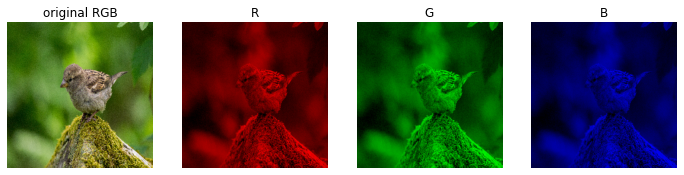

In [15]:
from copy import copy

count = 1
fig = plt.figure(figsize=(12,3*Nsample))
for rgb in Xsub_rgb:
    ## This section plot the original rgb
    ax = fig.add_subplot(Nsample,4,count)
    ax.imshow(rgb/255.0); ax.axis("off")
    ax.set_title("original RGB")
    count += 1
    
    for i, lab in enumerate(["R","G","B"]):
        crgb = np.zeros(rgb.shape)
        crgb[:,:,i] = rgb[:,:,0]
        ax = fig.add_subplot(Nsample,4,count)
        ax.imshow(crgb/255.0); ax.axis("off")
        ax.set_title(lab)
        count += 1
    
plt.show()

In [16]:
Xsub_rgb01 = Xsub_rgb/255.0

In [17]:
from skimage.color import rgb2lab, lab2rgb
Xsub_lab = rgb2lab(Xsub_rgb01)
plotMinMax(Xsub_lab,labels=["L","A","B"])  

______________________________
L : MIN=  0.0000, MAX= 97.4558
A : MIN=-40.5045, MAX= 32.3288
B : MIN=-14.3387, MAX= 78.1520


In [18]:
# lab2rgb has to have a dimension (-,-,3) 
Xsub_lab_rgb = np.zeros( Xsub_lab.shape)
for i in range(Xsub_lab.shape[0]):
    Xsub_lab_rgb[i] = lab2rgb(Xsub_lab[i])
plotMinMax(Xsub_lab_rgb.reshape((1,) + Xsub_lab_rgb.shape),labels=["R","G","B"]) 

______________________________
R : MIN=  0.0000, MAX=  0.5961
G : MIN=  0.0000, MAX=  0.5961
B : MIN=  0.0000, MAX=  0.5765


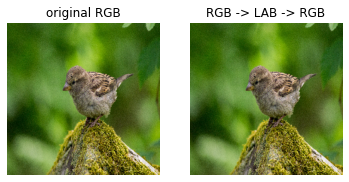

In [19]:
count = 1
fig = plt.figure(figsize=(6,3*Nsample))
for  irgb, irgb2 in zip(Xsub_rgb01, Xsub_lab_rgb):
    ax = fig.add_subplot(Nsample,2,count)
    ax.imshow(irgb); ax.axis("off")
    ax.set_title("original RGB")
    count += 1
    
    ax = fig.add_subplot(Nsample,2,count)
    ax.imshow(irgb2); ax.axis("off")
    ax.set_title("RGB -> LAB -> RGB")
    count += 1
    
plt.show()

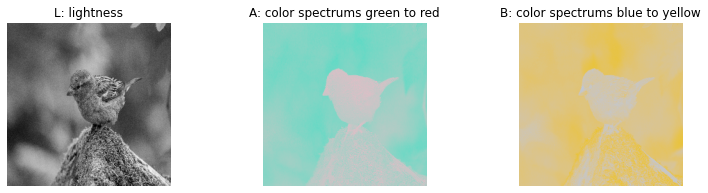

In [20]:
def extract_single_dim_from_LAB_convert_to_RGB(image,idim):
    '''
    image is a single lab image of shape (None,None,3)
    '''
    z = np.zeros(image.shape)
    if idim != 0 :
        z[:,:,0]=80 ## I need brightness to plot the image along 1st or 2nd axis
    z[:,:,idim] = image[:,:,idim]
    z = lab2rgb(z)
    return(z)

count = 1
fig = plt.figure(figsize=(13,3*Nsample))
for lab in Xsub_lab:
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,0) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("L: lightness")
    count += 1
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,1) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("A: color spectrums green to red")
    count += 1
    
    ax = fig.add_subplot(Nsample,3,count)
    lab_rgb_gray = extract_single_dim_from_LAB_convert_to_RGB(lab,2) 
    ax.imshow(lab_rgb_gray); ax.axis("off")
    ax.set_title("B: color spectrums blue to yellow")
    count += 1
plt.show()